# Car values from numberplate 

Choose system | windows = true, mac = false | 

Choose car | You can pick between "aygo" or "tesla" for now |



In [1]:
on_windows = False 
car_model = "Aygo"

### Find numberplate

Nummerpladen er: CM58 541



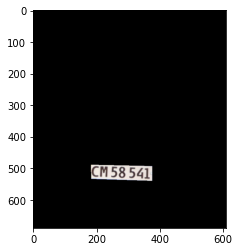

In [2]:
from modules import photohandling as ph

numberplate = ph.find_numberplate(on_windows, car_model)

### Scrape web data from nummerplade.net

In [3]:
import modules.nummerplade_scraper as np_scraper
search_car = np_scraper.numberplate_scraper(numberplate, on_windows)

search_car_km = search_car.get_car_km()
search_car_make_model = search_car.get_car_make_model()
search_car_year = search_car.get_car_model_year()


print("Search_car_km: " + search_car_km)
print("Search_car_year: " + search_car_year)
print("Mærke/model på søgte bil: ", search_car_make_model)

search_car.close_browser()

Starting up..
Got Browser
Search Entered
Search done
Search_car_km: 93000
Search_car_year: 2015 
Mærke/model på søgte bil:  Toyota Aygo 


### Scrape web data from Bilbasen.dk

In [4]:
import modules.bilbasen_scraper as bilbasen_scraper

bilbasen = bilbasen_scraper.my_car(on_windows)
bilbasen.click_cookie_button()
bilbasen.click_leasing_button()
bilbasen.search_in_search_bar(search_car_make_model)
print("Searching for: " + search_car_make_model)
bilbasen.get_car_list()
bilbasen.close_browser()
make_me_dataframe = bilbasen.car_list


Starting up...
Got Browser
Cookie Button Clicked
Leasing Button Clicked
Search Bar Entered
Searching for: Toyota Aygo 
Souping Site

Cars found: 31
{'name': 'Toyota Aygo 1,0  5d', 'km': 90000, 'price': '29900', 'year': 2008}
{'name': 'Toyota Aygo 1,0 Plus 5d', 'km': 85000, 'price': '33900', 'year': 2011}
{'name': 'Toyota Aygo 1,0 VVT-i x-play 5d', 'km': 49000, 'price': '74900', 'year': 2017}
{'name': 'Toyota Aygo 1,0 VVT-i x-play 5d', 'km': 39000, 'price': '59900', 'year': 2014}
{'name': 'Toyota Aygo 1,0 VVT-i x-press 5d', 'km': 57000, 'price': '64900', 'year': 2015}
{'name': 'Toyota Aygo 1,0 VVT-i x-play Touch 5d', 'km': 42000, 'price': '68900', 'year': 2015}
{'name': 'Toyota Aygo 1,0 VVT-i x-wave x-shift 5d', 'km': 73500, 'price': '89500', 'year': 2016}
{'name': 'Toyota Aygo 1,0 VVT-i x-wave Sky 5d', 'km': 153000, 'price': '58800', 'year': 2015}
{'name': 'Toyota Aygo 1,0 VVT-i T3 5d', 'km': 54000, 'price': '44900', 'year': 2012}
{'name': 'Toyota Aygo 1,0 VVT-i x-wave Sky 5d', 'km': 8

### Machine learning 

In [5]:

import modules.regression as regression
import pandas as pd

data = pd.DataFrame(make_me_dataframe) 
data.head()



,name,km,price,year
0,"Toyota Aygo 1,0 5d",90000,29900,2008
1,"Toyota Aygo 1,0 Plus 5d",85000,33900,2011
2,"Toyota Aygo 1,0 VVT-i x-play 5d",49000,74900,2017
3,"Toyota Aygo 1,0 VVT-i x-play 5d",39000,59900,2014
4,"Toyota Aygo 1,0 VVT-i x-press 5d",57000,64900,2015


##### Create instance of the regression class

In [6]:
find_car = regression.find_car_value(
    data, search_car_km, search_car_year)

#### Validate that we get data from dataframe

In [7]:
find_car.show_dataframe()

,name,km,price,year
0,"Toyota Aygo 1,0 5d",90000,29900,2008
1,"Toyota Aygo 1,0 Plus 5d",85000,33900,2011
2,"Toyota Aygo 1,0 VVT-i x-play 5d",49000,74900,2017
3,"Toyota Aygo 1,0 VVT-i x-play 5d",39000,59900,2014
4,"Toyota Aygo 1,0 VVT-i x-press 5d",57000,64900,2015


#### Normalizing the data 

In [8]:
scaled_df = find_car.normalize_data()

#### Data visualization with normalized data

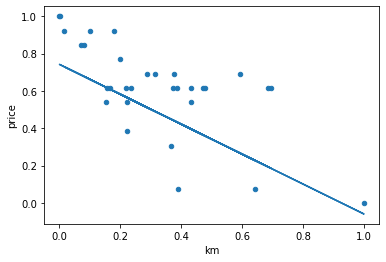

In [9]:
from matplotlib import pyplot as plt
import numpy as np

x1 = scaled_df['km']
y = scaled_df['price']

scaled_df.plot.scatter(x = 0, y = 1)
plt.xlabel("km")
plt.ylabel("price")

m, b = np.polyfit(x1, y, 1)
plt.plot(x1, m*x1+ b)


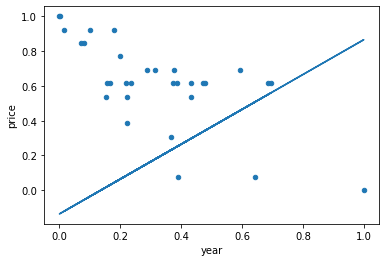

In [10]:
x2 = scaled_df['year']
y = scaled_df['price']

scaled_df.plot.scatter(x=0, y=1)
plt.xlabel("year")
plt.ylabel("price")

m, b = np.polyfit(x2, y, 1)
plt.plot(x1, m*x1+b)

#### Describing the data to get an idea of the values 

In [11]:
find_car.describe_data()


,km,year
count,31.000000,31.000000
mean,75096.774194,2015.064516
std,49611.534169,3.234558
min,6600.000000,2007.000000
25%,41000.000000,2014.500000
50%,68000.000000,2015.000000
75%,99000.000000,2016.500000
max,220000.000000,2020.000000


#### Trains the model using the data fetched 

In [12]:
find_car.train_model()


(        km  year
 2    49000  2017
 29   45000  2019
 13   99000  2014
 10  133000  2016
 27    6600  2020
 25   22000  2018
 22  109000  2015,
 2      74900
 29     89900
 13     59800
 10     59900
 27    112500
 25     84900
 22     69800
 Name: price, dtype: object)

#### Finding slope and interception | Used for data visualization

In [13]:
coeff_df, intercept = find_car.show_coff_and_interception()


Using the coeff and the interception given by the linear regression model to do the graph.
Then we combine the two coefficents and plot the data.

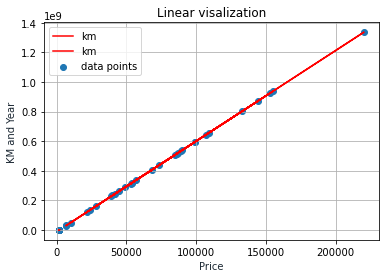

In [14]:
x, y = find_car.get_x_y()

km_coeff = int(coeff_df.iloc[0])
year_coeff = int(coeff_df.iloc[1])

slope = (km_coeff) + (year_coeff)
y = slope*x+intercept

plt.plot(x, y, '-r', label='km')
plt.scatter(x,y, label="data points")
plt.title('Linear visalization')
plt.xlabel('Price', color='#1C2833')
plt.ylabel('KM and Year', color='#1C2833')
plt.legend(loc='upper left')
plt.grid()
plt.show()

#### Compare actual scraped values to the ones predicted by the model

In [15]:
find_car.prediction_vs_real()


,Actual,Predicted
2,74900,83550.045972
29,89900,95929.446705
13,59800,63739.355185
10,59900,75046.473916
27,112500,103146.280358
25,84900,90445.195024
22,69800,69590.440183


#### Shows the predicted value of the entered car

In [16]:
find_car.predict_car_value()

Predicted price of the entered car:  [70041.92734131]


The following piece of code compares how accurate the code is based on the metrics.score() function

In [17]:
find_car.predict_data_accuracy()

Model accuracy:  0.8882353616071662
